# MTH4000 Programming in Python I - Lecture 11
Module Organisers: Dr Matthew Lewis and Prof. Thomas Prellberg

This week we will cover some general tips and tricks, followed by some analysis of complexity, to encourage good programming.

## Multiple statements in one line?

One central feature of Python is that, unlike some other programming languages, you do not need to separate statements with special characters (e.g. semicolons), nor do you need to use brackets to demarcate code blocks. 

Let's take some simple Python function:

```Python
def max(num1, num2):
    if num1 > num2:
        result = num1
    else:
        result = num2
    return result
```

We have seen that in Python, statements are separated by new lines, and code blocks are structured by indentation. In C, the same code looks as follows:

```C
int max(int num1, int num2) {
   int result;
   if (num1 > num2)
      result = num1;
   else
      result = num2;
   return result; 
}
```

We can notice several differences in the structure of this code.  Firstly, C requires us to declare variables and their data types before using them.  Secondly, all statements are separated by semicolons, and code blocks containing more than one statement are connected by bracketing. 

This makes indenting entirely optional; the above code can be written on one single line as follows:

```C
int max(int num1, int num2) { int result; if (num1 > num2) result = num1; else result = num2; return result; }
```

or indeed, as follows:

```C      
                  int 
                 max (
               int num1,
              int num2) {
             int result; if 
           (num1>num2) result 
          = num1; else result = 
          num2; return result;}
```

While the last example looks just silly (and makes the code very difficult to read), there is sometimes an advantage in having fewer lines of code. Python does allow you to have several statements on a single line *provided there are no nested code blocks*. In that case, statements need to be separated by a semicolon.

If you have a code block containing many single statements in sequence, then you can do it. For example:

In [1]:
a=int(input())
b=int(input())
c=a+b
s="{0}+{1}={2}"
print(s.format(a,b,c))

1
2
1+2=3


is equivalent to:

In [2]:
a=int(input()); b=int(input()); c=a+b; s="{0}+{1}={2}"; print(s.format(a,b,c))

1
2
1+2=3


Moreover, if a code block can be written in a single line, then it's possible to combine it with the preceding keyword statement (the line ending with a `:` that initialises the code block).  The intial example, for instance, can be written as:

In [3]:
def max(num1, num2):
    if num1 > num2: result = num1
    else: result = num2
    return result

While slightly more compact than the original, I find this to be less readable. You will have noticed that throughout the entire module I have refrained from doing these things, as it generally is not necessary and can lead to harder to read code.

## Inline `if`, or ternary (conditional) operator

We already encountered the ternary if as a useful tool in the algorithms section. Let's go over it again in some more detail:

Suppose you have an `if` statement that is simple in structure.  More specifically, it contains only an `if` and an `else` block, and both code blocks can be written in a single line.  Such statements can be greatly simplified by a Python feature called a ternary operator.

The ternary operator is useful when, for example, you want to select one of two values depending on some condition. For example, the function

```Python
def max(num1, num2):
    if num1 > num2:
        result = num1
    else:
        result = num2
    return result
```
above can be written as follows:

In [4]:
def max(num1, num2):
    result = num1 if num1 > num2 else num2
    return result

So what is going on? The syntax is

```Python
value1 if condition else value2
```

and evaluates to `value1` if the condition is true, otherwise it evaluates to `value2`. Note that there is no assignment made here, the assignment to the variable `result` in the above example happens only *after* the value is computed. 

In fact, this syntax allows us to bypass the assignment entirely, and we can further simplify our function as follows:

In [5]:
def max(num1, num2): return num1 if num1 > num2 else num2

We can also extend this feature to replace `if`-`elif`-`elif`-...-`else` constructions.  This can be achieved by nesting the ternary operator.

Let's assume we want to input a single character, and we want to change all the lowercase vowels a,e,i,o,u to uppercase A,E,I,O,U, respectively, and change them to X if the character is not a lowercase vowel. We could write this as follows:

In [6]:
c=input()
if c=="a":
    x="A"
elif c=="e":
    x="E"
elif c=="i":
    x="I"
elif c=="o":
    x="O"
elif c=="u":
    x="U"
else:
    x="X"
print(x)

x
X


The equivalent code, using nested ternary operators, works as follows:

In [7]:
c=input()
print("A" if c=="a" else "E" if c=="e" else "I" if c=="i" else "O" if c=="o" else "U" if c=="u" else "X")

x
X


As there is no assignment done, this is also immensely useful in list comprehensions. Let's assume we input a string and want to do the encoding for every letter of that string.

In [8]:
s="This is so cool!"
print(["A" if c=="a" else "E" if c=="e" else "I" if c=="i" else "O" if c=="o" else "U" if c=="u" else "X" for c in s])

['X', 'X', 'I', 'X', 'X', 'I', 'X', 'X', 'X', 'O', 'X', 'X', 'O', 'O', 'X', 'X']


## Use of `if` as a filter in list comprehensions

Finally, I should point out another use of `if` in list comprehensions, namely as a filter. For example, if we only want to return the vowels contained in a given string, we can do it as follows:

In [9]:
s="This is so cool!"
print([c for c in s if c in "aeiou"])

['i', 'i', 'o', 'o', 'o']


We can combine this filter with the mapping in the above example.  This requires us to use `if` in the ternary operator *before* the `for` keyword, and `if` as a filter *after* the `for` keyword.

In [10]:
s="This is so cool!"
print(["A" if c=="a" else "E" if c=="e" else "I" if c=="i" else "O" if c=="o" else "U" if c=="u" else "X" 
       for c in s if c in "aeiou"])

['I', 'I', 'O', 'O', 'O']


Note that this means that we have now seen three *different* uses of `if` in Python:

1. Conditional Statement

```Python
def collatz(x):
    if x%2==0:
        x=x//2
    else:
        x=3*x+1
    return x
```

2. Ternary Operator

```Python
collatz=lambda x: x//2 if x%2==0 else 3*x+1
```

3. Filter in List Comprehensions

```Python
[3*x+1 for x in range(10) if x%2!=0]
```

To confuse people, we can use filtering and the ternary operator in one single list comprehension:

In [11]:
[x if x%2 else -x for x in range(20) if x%3]

[1, -2, -4, 5, 7, -8, -10, 11, 13, -14, -16, 17, 19]

## Dictionaries

The above chain construction of `if`'s and `else`'s becomes unwieldy as the number of cases becomes large, so you may wonder if there is a better way of coding this.  To answer this, we introduce a new data type; dictionaries.

A dictionary is a composite data type, just like lists and tuples.  The key difference is that instead of its elements being indexed by integers in the range $0$ to $n-1$ (where $n$ is its length), it is instead indexed with a set of uniquely defined objects called *keys*:

```python
d = {key0: value0, key1: value1, key3: value3, ..., keyn: valuen}
```

We can see that each value contained inside the dictionary is paired with a unique key.  In order to call a given value inside this dictionary, it suffices to index the dictionary with the corresponding key, e.g. `d[key1]` would return `value1`.

In [12]:
shapes={'triangle':3, 'quadrilateral':4, 'pentagon':5}

shapes['pentagon']

5

Similarly to lists, we can add (or update) dictionary entries by using assignments:

In [13]:
shapes['hexagon']=6

shapes

{'triangle': 3, 'quadrilateral': 4, 'pentagon': 5, 'hexagon': 6}

We can delete entries with the `del` keyword:

In [14]:
del shapes['triangle']

shapes

{'quadrilateral': 4, 'pentagon': 5, 'hexagon': 6}

We can even determine whether a key exists inside a given dictionary using the `in` keyword:

In [15]:
'square' in shapes

False

Python dictionaries have much more functionality than this, but this will suffice for a brief introduction.

We can use dictionaries to simplify the above vowel substitution:

```python
"A" if c=="a" else "E" if c=="e" else "I" if c=="i" else "O" if c=="o" else "U" if c=="u" else "X"
```

If we define

```python
dic = {"a": "A", "e": "E", "i": "I", "o": "O", "u": "U"}
```

then all of the substitution rules in the above statement (with the exception of non-vowels being mapped to `X`) can be accessed by simply indexing the dictionary `dic` with the appropriate character,

```python
dic[c]
```
(provided the value of c exists as key in `dic`). The code is therefore the following:

In [16]:
dic = {"a": "A", "e": "E", "i": "I", "o": "O", "u": "U"}
c=input()
print(dic[c] if c in dic else "X")

x
X


The list comprehension from above becomes much more readable, in my opinion. Instead of
```python
s="This is so cool!"
print(["A" if c=="a" else "E" if c=="e" else "I" if c=="i" else "O" if c=="o" else "U" if c=="u" else "X" for c in s])
print(["A" if c=="a" else "E" if c=="e" else "I" if c=="i" else "O" if c=="o" else "U" if c=="u" else "X" 
       for c in s if c in "aeiou"])
```
we can instead write

In [17]:
s="This is so cool!"
dic = {"a": "A", "e": "E", "i": "I", "o": "O", "u": "U"}
print([dic[c] if c in dic else "X" for c in s])
print([dic[c] for c in s if c in dic])

['X', 'X', 'I', 'X', 'X', 'I', 'X', 'X', 'X', 'O', 'X', 'X', 'O', 'O', 'X', 'X']
['I', 'I', 'O', 'O', 'O']


There's much more to this, but we're running out of time in this module...

## The `*` operator, or "cool tricks with unpacking"

... and I still want to return to one last topic, namely unpacking. You will recall that we have encountered code like
```python
a,b=["first","second"]
```
which automatically unpacks the right hand side of the assignment and assigns each item individually. This is quite convenient, and it can be done with all sorts of iterables, such as strings:

In [18]:
a="and"
print(a)

and


In [19]:
b,c,d="and"
print(b)
print(c)
print(d)

a
n
d


In [20]:
# b,c="and" # error, number of variables must match length of iterable

What if we want to use such an assignment where the number of variables does **not** match the length of the iterable?

This is where the `*` operator comes to the rescue.  Observe the following example:

In [21]:
a,*b=(12,13,14,15)
print(a)
print(b)

12
[13, 14, 15]


The value $12$ is assigned to the variable `a`, as per usual, but there is only a single variable left to be defined, despite the fact that there are three values remaining in the right-hand tuple.  Applying the `*` operator to `b` means that `b` is assigned the value of a list containing all the remaining elements that have been left unassigned.

Note that we can also apply the `*` operator to the first variable, which packs the first three elements in a list and assigns it to `a`.

In [22]:
*a,b=(12,13,14,15)
print(a)
print(b)

[12, 13, 14]
15


We can even apply this operator to a sequence containing a single variable, as follows:

In [23]:
*a,=(12,13,14,15)
print(a)

[12, 13, 14, 15]


Note that we have to use the notation `a,` (with a trailing comma), in order to write the left-hand side as a tuple of length $1$, instead of a single variable.

It should be clear that the same result could have been achieved with

```python
a=list((12,13,14,15))
```
but the operator `*` is more versatile: we can add additional variables around both sides of the variable marked with `*`, as long as there is only one `*` on the list (otherwise the operation is not well defined).

In [24]:
a,b,*c,d,e,f=(12,13,14,15,16,17,18,19)
print(a,b,c,d,e,f)
a,b,*c,d,e,f=(12,13,14,15,16,17)
print(a,b,c,d,e,f)
a,b,*c,d,e,f=(12,13,14,15,16)
print(a,b,c,d,e,f)
# a,b,*c,d,e,f=(12,13,14,15) # error, not enough number of items 

12 13 [14, 15, 16] 17 18 19
12 13 [14] 15 16 17
12 13 [] 14 15 16


Of course this could also be done with slicing of lists, for example the first statement of the previous code box is equivalent to:

In [25]:
s=(12,13,14,15,16,17,18,19)
a=s[0]; b=s[1]; c=list(s[2:-3]); d=s[-3]; e=s[-2]; f=s[-1]
print(a,b,c,d,e,f)

12 13 [14, 15, 16] 17 18 19


Conversely, the `*` operator can also be used when evaluating expressions.  In situations where Python is expecting a sequence of values to be returned to the interpreter one-by-one, the `*` operator allows items contained inside a list (or tuple) to be read as if they had been returned separately.

Notice what happens when we try to create a list of the variables defined above:

In [26]:
s=[a,b,c,d,e,f]
print(s)

[12, 13, [14, 15, 16], 17, 18, 19]


Since `c` is a list, it gets included in `s` as a single item.  We can use the `*` operator to unpack this list and include each element separately:

In [27]:
s=[a,b,*c,d,e,f]
print(s)

[12, 13, 14, 15, 16, 17, 18, 19]


Similarly, if a given function has several arguments, then the `*` operator can be used to return input values to all these arguments using a single variable.

In [28]:
l=['First print this.','Print this next.','Print this last.']

print(*l)

First print this. Print this next. Print this last.


This code is equivalent to

In [29]:
print(l[0],l[1],l[2])

First print this. Print this next. Print this last.


but is clearly much more succint.

### An application: from list of points to lists of coordinates and back

From earlier lectures you will recall that the following conversion was needed when changing beween different representations of points, for example when plotting using matplotlib.

In [30]:
# Points are written as a list of pairs.
points=[(0,10),(3,16),(-1,15),(2,-11)]
print(points)

[(0, 10), (3, 16), (-1, 15), (2, -11)]


In [31]:
# We separate these pairs into a list, xcoords, of all values at index 0
# and a list, ycoords, of all values at index 1.
xcoords=[point[0] for point in points]
ycoords=[point[1] for point in points]
print(xcoords,ycoords)

[0, 3, -1, 2] [10, 16, 15, -11]


In [32]:
# We can retrieve the original list using the zip function, which zips together
# all values indexed at 0, 1, 2, and 3.
newpoints=list(zip(xcoords,ycoords))
print(newpoints)

[(0, 10), (3, 16), (-1, 15), (2, -11)]


Given that the `zip` function accepts several arguments, we can do the first step more elegantly (and in a more "pythonic" way) using the `*` operator:

In [33]:
xcoords2,ycoords2=zip(*points)
print(xcoords,ycoords)

[0, 3, -1, 2] [10, 16, 15, -11]


What happened in the code above?  Well, the `*` operator forced the `zip` function to accept the elements `points[0]`, `points[1]`, etc as separate input parameters, meaning that the values of the pairs indexed at $0$ were all packed into a single list, as were the values of the pairs indexed at $1$.

We can again use the `*` operator to unpack the resulting lists and return each separately to the `print` function.

In [34]:
print(*zip(*points))

(0, 3, -1, 2) (10, 16, 15, -11)


Well, OK, this gives you tuples and not lists, so I am simplifying a bit (unpacking the generator depends on context, in case you're interested). However, this can now be used to transform between both representations by simply repeating the process. Repeatedly using the `*` operator to unpack the resulting iterables, we get:

In [35]:
print(*points)
*coords,=zip(*points)
print(*coords)
*newpoints,=zip(*coords)
print(*newpoints)
*newcoords,=zip(*newpoints)
print(*newcoords)

(0, 10) (3, 16) (-1, 15) (2, -11)
(0, 3, -1, 2) (10, 16, 15, -11)
(0, 10) (3, 16) (-1, 15) (2, -11)
(0, 3, -1, 2) (10, 16, 15, -11)


Alternatively, nesting `*zip()` in a function call such as `print()` looks as follows:

In [36]:
print(*points)
print(*zip(*points))
print(*zip(*zip(*points)))
print(*zip(*zip(*zip(*points))))

(0, 10) (3, 16) (-1, 15) (2, -11)
(0, 3, -1, 2) (10, 16, 15, -11)
(0, 10) (3, 16) (-1, 15) (2, -11)
(0, 3, -1, 2) (10, 16, 15, -11)


The really cool thing is that you can go back by applying the same operation twice: I conclude with the mathematical observation that `*zip()` acts as an involution.

## Python Function Arguments

### The `print` function revisited

By now, we are really well acquainted with various uses of the `print` function. Let me give you some examples.

In [37]:
print('Various uses of the print function')
print()
print('sin(π) =', 0, 'and cos(π) =', -1)
print('sin(π) =', 0, 'and cos(π) =', -1, sep='...')

Various uses of the print function

sin(π) = 0 and cos(π) = -1
sin(π) =...0...and cos(π) =...-1


What I would want you to focus on now is two things: first of all, the `print` function seems to have no fixed number of arguments. Indeed, in the first three lines this function is used with one, zero, and four arguments, respectively. Additionally, there is also this strange piece of code `sep='...'`, which changes the separator string between arguments. It overwrites the default separator string ' ' (blank space) by '...' (three periods).

It turns out that all of this is not special for the `print` function at all, but represents features that we can use for functions we write ourselves.

### Functions with an arbitrary number of arguments, `*args`

One feature of the `print` function is that it can take an arbitrary number of arguments. You may recall that when we wanted to compute a sum of numbers, we had to put the numbers into a list and call `sum` with the list as an argument. In other words,
```python
sum([1,2])
```
works, but
```python
sum(1,2)
```
produces an error. We will now write a function `my_sum` that takes an arbitrary number of arguments (provided they are all numerical) and sums them all up, i.e. can be used as
```python
my_sum(1,2)
```

In [38]:
def my_sum(*numbers):
    s=0
    for i in numbers:
        s=s+i
    return(s)

print(my_sum(1,2,3))
print(my_sum(1,2.,1+1j))

6
(4+1j)


So what happened here? `*numbers` means that the operator * packs all the items that you hand over when calling the function into a list and assigns that list to `numbers`. This implies that you can do things like iterate over it (as done above), or access the various arguments by indexing `numbers[i]`. 

We can in fact simply write the following:

In [39]:
def my_sum(*numbers):
    return sum(numbers)

my_sum(3,-9,7)

1

To be really explicit, in the above example `numbers` is an iterable with `numbers[0]=3`,`numbers[1]=-9`, and `numbers[2]=7`. 

Finally, you can use a fixed number of other arguments **before** the `*args` construction.

In [40]:
def my_sum(start,*numbers):
    s=start
    for i in numbers:
        s=s+i
    return(s)

my_sum(3,-9,7)

1

This looks just the same as above, but in fact now `start=3`, `numbers[0]=-9`, and `numbers[1]=7`. The beauty of this function definition is that we can use this function to concatenate strings as well (it doesn't work with the previous definitions of `my_sum()` - ask yourself why).

In [41]:
my_sum('S','O','S')

'SOS'

### Functions with default arguments

The other feature of the `print` function is that the separator string could be changed by `sep="..."`. To remind ourselves, `sep` has a pre-defined value: if you don't assign anything to the separator then `sep=" "` is a blank space by default.

In [42]:
print("this", "is", "widely", "spaced", sep="             ")
print("and", "this", "is", "normally", "spaced") #default separator value " "
print() #empty line
print("a", "new" ,"line", "for", "each", "string", sep="\n")

this             is             widely             spaced
and this is normally spaced

a
new
line
for
each
string


This is a nice feature that we can use when writing our own functions. Let's think of all these root finding algorithms. Maybe you want one function from which you use the bisection method, regula falsi, and secant method, with the secant method being the default.

In [43]:
def root_finding(f,a,b,n,method="secant"):
    if method=="secant":
        print("using secant method")
        #root=secant(f,a,b,n)
    elif method=="regula falsi":
        print("using regula falsi")
        #root=regula_falsi(f,a,b,n)
    elif method=="bisection":
        print("using bisection")
        #root=bisection(f,a,b,n)
    else:
        print("allowed methods are 'secant', 'regula falsi', 'bisection'")
        #root=None
    #return root

Some lines are commented out as I am just trying to get the principle across: if the method is not specified, then the function uses "secant" by default, if a valid method is specified, the function uses that, and if an invalid method is specified, the function prints out a helpful message.

In [44]:
root_finding(lambda x: x*(2-x), -1, 1, 10)
root_finding(lambda x: x*(2-x), -1, 1, 10, method="secant")
root_finding(lambda x: x*(2-x), -1, 1, 10, method="regula falsi")
root_finding(lambda x: x*(2-x), -1, 1, 10, method="bijection")

using secant method
using secant method
using regula falsi
allowed methods are 'secant', 'regula falsi', 'bisection'


## How complex is an algorithm?

We have already pointed out that one should think of writing efficient code. We shall now look into what this means in more detail. Python already helps you with this, for example by not making copies of whole arrays during assignment, unless you specify `.copy()`. Doing so would waste both computer memory and run time. Moreover, `numpy` provides optimised functionality for linear algebra calculations. So we haven't really had to worry about this so far. 

But occasionally it is necessary to design or choose good algorithms and to implement them efficiently. To do so, we first have to introduce some terminology.

In general, how quickly an algorithm will provide an answer will depend on the actual machine that the code is run on, so in order to discuss complexity theoretically we will focus on both the **number of executions** needed, and the **memory** needed. The former is the **time complexity**, the latter the **memory complexity** of the algorithm. Complexity analysis focusses on the question of how these quantities grow if the **size** of the problem increases. For this, we will use [**O() notation**](https://en.wikipedia.org/wiki/Big_O_notation), which allows us to make abstract statements about this growth. Here, n can be the length of a list to be sorted, the index of a Fibonacci number to be computed, and so on.

Roughly, the $O(n)$ notation states how fast a quantity grows as $n$ becomes large. For example, if $T(n)$ is the run time, and $f(n)$ is some positive increasing function of $n$, then

$$T(n)=O(f(n))\quad\text{as}\quad n\to\infty$$

means that there exists some $M>0$ and some $n_0$ such that $T(n)\leq M f(n)$ for all $n\geq n_0$.

Note that the $O(n)$ notation ignores the size of the prefactor $M$, as this is irrelevant when looking at the growth for really large values of $n$. Typical examples are

- $O(1)$: constant growth: no increase of $T(n)$ at all when $n$ increases
- $O(\log n)$: logarithmic growth: when $n$ doubles, $T(n)$ increases by a constant amount
- $O(n)$: linear growth: when $n$ doubles, so does $T(n)$
- $O(n^d)$: polynomial growth: when $n$ doubles, $T(n)$ increases by a factor $2^d$
- $O(c^n)$: exponential growth: when $n$ increases by one, $T(n)$ increases by a factor $c$
- $O(n!)$: factorial growth - about as bad as it gets (example: computing all permutations of $n$ objects)

Normally there is an implicit optimality assumption when people are using this notation, as by the mathematical definition above, one could say [for example](https://stackoverflow.com/questions/44341669/how-is-on-algorithm-also-an-on2-algorithm) that $O(n)=O(n^2)$. (Unfortunately, the equals sign is also not reflexive in this notation: $O(n^2)=O(n)$ is clearly nonsense.)

In [45]:
import random # to generate some randomly chosen examples below
from timeit import timeit
import matplotlib.pyplot as plt
import numpy as np

In what follows, we shall mainly consider the case of time complexity, as this is harder to analyse. Memory complexity is generally easier to understand, as you just have to consider the amount of data that is needed to store (lists, arrays, ...).

## Fibonacci numbers

We shall start with the complexity analysis of an example we encountered before when we discussed recursion.

As you now have learned about the ternary if, I can write the Fibonacci recursion simply as

In [46]:
fib = lambda n: 1 if n<2 else fib(n-1)+fib(n-2)

print([fib(n) for n in range(20)])

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


This simplicity however has a fairly bad drawback: at each level of the recursion `fib()` is called twice, implying the run time increases as fast as the growth of the Fibonacci numbers itself, so we expect exponential growth $O(c^n)$. (More precisely, $c$ here is the golden ratio 1.618... .)

On the face of it, not much data storage is needed by each function call, but as the computation of `fib(n)` needs n-fold recursion down to `fib(0)`, storage of intermediate data implies an overall memory complexity of $O(n)$.

An alternative implementation stores previously computed values and produces $O(n)$ growth:

In [47]:
def fib2(n):
    lst=[1,1]
    for m in range(2,n+1):
        lst.append(lst[-1]+lst[-2])
    return lst[-1]

print([fib2(n) for n in range(20)])

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


Here, the memory complexity is again $O(n)$ due to the need to maintain a list of size $n$. So far for the theoretical analysis. It is now time to test these assertions in Python.

## Run-time analysis in Python

To verify the above assertions, we can use the [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) command `%timeit`. This is *not* a Python command, but gives easy access to a quick run-time check.

In [48]:
%timeit fib(5)

1.7 µs ± 278 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [49]:
%timeit fib2(5)

1.01 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


This command returns the average time to run the code (as you can see, it fluctuates a bit). and automatically picks some parameters for you: (a) the loop count, which tells you how many times the statement was run per timing loop repetition, and (b) the run count, which tells you how many times the timing loop was repeated.

So it seems to be clear that `fib2` is better than `fib`, in line with our above analysis. But this is all done for fixed size n=5, so it does not tell us anything about the complexity growth as n changes. For that, we have to run the same for different values of n.

In [50]:
%timeit fib(10)

18.4 µs ± 2.86 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [51]:
%timeit fib2(10)

1.51 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


It does seem that increasing n by a factor of 2 increases the runtime of `fib` tenfold, but only doubles the run time of `fib2`. This is encouraging, but we should dig deeper.

What makes the magic command work is the `timeit` module, which provides the function `timeit()`. This needs the statement we wish to time as a textstring, and contains an optional argument `number` preset to `number=1000000`. Moreover, as we will want to time functions defined elsewhere, we also annoyingly need to specify `globals=globals()` - let's not dive to deeply into this here.

We can repeat the last magic command by running `timeit()` with `numbers=1000` seven times:

In [52]:
loops=1000000
N=10
for _ in range(7):
    T=timeit('fib2(N)',number=loops,globals=globals()) # here we need globals() to allow hand over of N
    print(T/loops)

1.4491896999970777e-06
1.4100962999946205e-06
1.2477344999933848e-06
1.3329784000088693e-06
1.506865600007586e-06
1.6586029000027338e-06
1.4011222999979508e-06


We still had to divide the total run time by the number of loops to get the result from above. The natural fluctuation of the run time, due to resource competition with other processes on the computer, still creates fluctuations.

Using `timeit()`, we can compute the run time against n for several values of n. As you can see, it takes some time to compute this, so it is advisable to use parameters judiciously. Not too many values of n, and not too many loops or runs either.

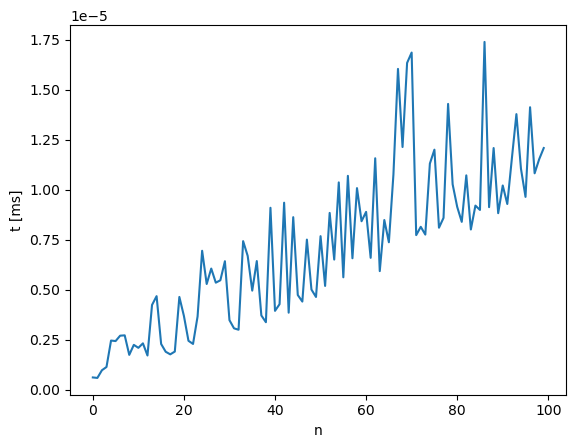

In [53]:
Nvalues=range(100)
Tvalues=[]
loops=1000
for N in Nvalues:
    Tvalues.append(timeit('fib2(N)',number=loops,globals=globals())/loops)
plt.plot(Nvalues,Tvalues)
plt.xlabel("n")
plt.ylabel("t [ms]")
plt.show()

You clearly see linear growth in n, but you also see a ruggedness reflecting resource competition (the details will change every time you repeat the calculation). It might thus be more advisable to replace the average over runs by the minimum. Here, this is safe to do, as the complexity does not change between runs: we always repeat the same calculation.

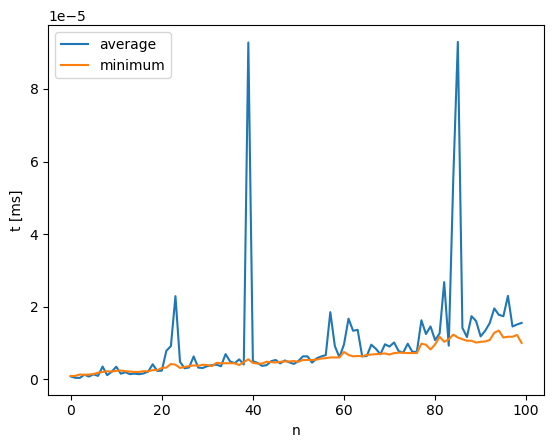

In [54]:
Nvalues=range(100)
Tvalues=[]
Tvalues2=[]
loops=1000
for N in Nvalues:
    Tvalues.append(timeit('fib2(N)',number=loops,globals=globals())/loops)
    Tvalues2.append(min([timeit('fib2(N)',number=1,globals=globals()) for _ in range(loops)]))
plt.plot(Nvalues,Tvalues,label="average")
plt.plot(Nvalues,Tvalues2,label="minimum")
plt.xlabel("n")
plt.ylabel("t [ms]")
plt.legend()
plt.show()

Regardless of the details, we clearly see a linear growth of the run time as a function of $n$, and hence $O(n)$ time complexity, for `fib2()`.

After these preparations, we can compare `fib()` and `fib2()`. Note that the values have to be chosen carefully to balance run-time and precision. In particular, for `fib()` I need to restrict to much smaller values of $n$.

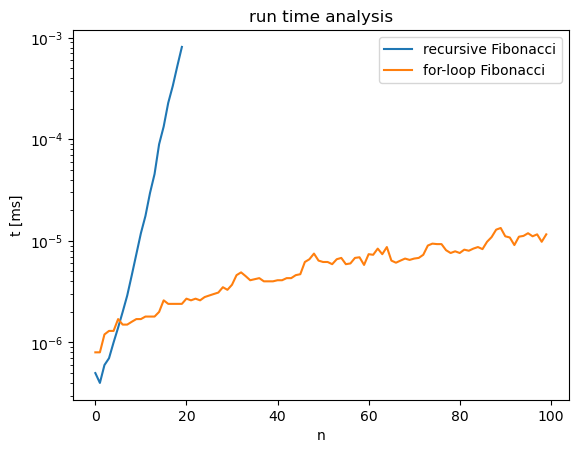

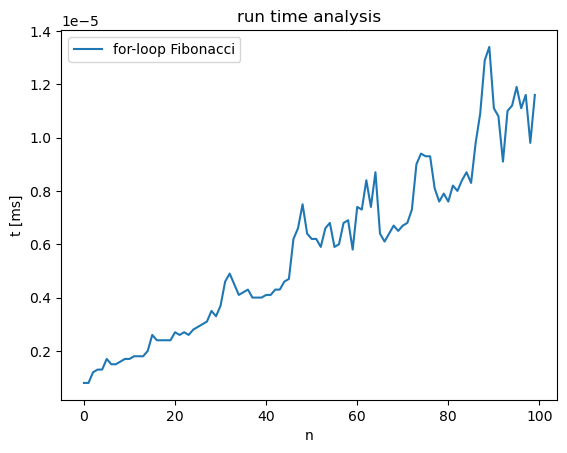

In [55]:
Nvalues=range(20)
Tvalues=[]
loops=1000
for N in Nvalues:
    Tvalues.append(min([timeit('fib(N)',number=1,globals=globals()) for _ in range(loops)]))
Nvalues2=range(100)
Tvalues2=[]
for N in Nvalues2:
    Tvalues2.append(min([timeit('fib2(N)',number=1,globals=globals()) for _ in range(loops)]))
plt.title("run time analysis")
plt.plot(Nvalues,Tvalues,label="recursive Fibonacci")
plt.plot(Nvalues2,Tvalues2,label="for-loop Fibonacci")
plt.xlabel("n")
plt.ylabel("t [ms]")
plt.yscale("log")
plt.legend()
plt.show()
plt.title("run time analysis")
plt.plot(Nvalues2,Tvalues2,label="for-loop Fibonacci")
plt.xlabel("n")
plt.ylabel("t [ms]")
plt.legend()
plt.show()

This example shows clearly that implementation details matter: Extrapolating the straight line in the semi-logarithmic plot, we see that `fib(100)` would take about $10^{12}$ times as long as `fib(20)` to run, so roughly a year, whereas `fib2(100` only takes a fraction of a microsecond.

# THE END

We have now arrived at the end of our lectures. There is much we haven't covered, both on the programming and on the algorithms side. If you liked this, look for more programming modules next year!